# Problema Cativo x Livre

A unidade consumidora de energia elétrica em questão é um consumidor cativo e está na modalidade tarifária horária verde, pertencente ao subgrupo A4.

Faça a Análise de Viabilidade Cativo x Livre para essa Unidade Consumidora.

Os dados de consumo para um ano típico, em base mensal, estão disponíveis na Planilha Excel abaixo.

[Planilha de apoio](./documentos/planilhaAlunoJonatas.xlsx)

Agora compare as alternativas acima com a alternativa de colocar um sistema fotovoltaico na unidade consumidora e ela continuar no ACR (Ambiente de Contratação Regulada).

Depois compare com a alternativa da unidade consumidora ter o sistema de geração fotovoltaica e migrar para o ACL tornando-se Autoprodutor.

Depois de tudo, compare as alternativas de negócios acima com a alternativa da unidade consumidora ter o sistema de geração fotovoltaica, migrar para o ACL tornando-se Autoprodutor e possuir um BESS (Battery Energy Storage System) de Íon-Lítio.

Qual das 5 alternativas é a melhor para essa Unidade Consumidora?

Para relembrar as 5 alternativas segue um resumo:
1. Continuar no ACR (pode mudar de tarifa horosazonal);
2. Ir para o ACL;
3. Continuar no ACR e instalar Sistema Fotovoltaico;
4. Ir para o ACL com Sistema Fotovoltaico e tornar-se Autoprodutor (com geração local ou remota);
5. Alternativa 4 + BESS de Íon-Lítio.

Obs: Lembrar que o Consumidor Livre pode escolher entre pagar as TUSD´s pela tarifa horosazonal Azul ou Verde. Se o Consumidor Livre escolher a tarifa horosazonal Azul ele vai ter que contratar uma demanda na ponta e contratar uma demanda fora ponta.

Quando esse consumidor se tornar livre e comprar energia incentivada 50% ou 100%, o desconto vai incidir conforme as regras da Tabela 3 da Resolução Homologatória das Tarifas da Distribuidora.

![Benefícios tarifários - Percentuais de desconto](./imagens/beneficiosTarifarios.png)

Pelas regras atuais (ano 2022) um Consumidor Cativo pode se tornar Livre caso a demanda contratada ponta ou a demanda contratada fora ponta seja > 500 kW.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:

autoprod_data = pd.read_excel('./documentos/planilhaAlunoJonatas.xlsx',header=1)

autoprod_data['Demanda contratada (kW)'].fillna(method='ffill', inplace=True)

autoprod_data.head(12)
# autoprod_data.dtypes

,Unnamed: 0,CONSUMO NA PONTA (kWh),CONSUMO FORA DA PONTA (kWh),DEMANDA NA PONTA (kW),DEMANDA FORA DA PONTA (kW),Demanda contratada (kW)
0,JAN,85688.40,862848.0,2039.52,2788.80,2800.0
1,FEV,99822.24,967260.0,2533.44,3487.68,2800.0
2,MAR,120030.96,1223544.0,2862.72,3917.76,2800.0
3,ABR,128016.84,1190448.0,2724.96,3837.12,2800.0
4,MAI,125018.04,1227408.0,2506.56,3444.00,2800.0
5,JUN,103962.31,982487.1,2446.08,3299.52,2800.0
6,JUL,95302.20,897456.0,2106.72,2741.76,2800.0
7,AGO,96771.36,942984.0,1995.84,2718.24,2800.0
8,SET,99086.40,885780.0,2126.88,2741.76,2800.0
9,OUT,117633.60,1067556.0,2231.04,3050.88,2800.0


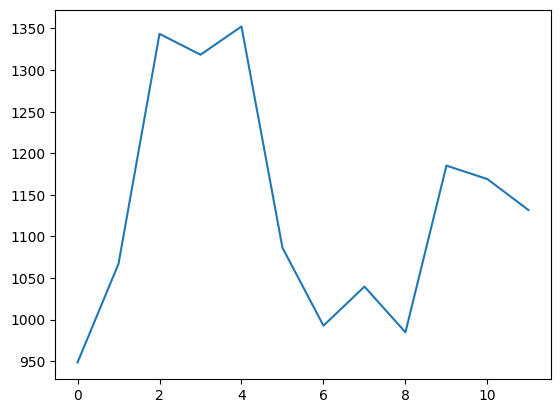

In [38]:
meses = autoprod_data['Unnamed: 0'].to_numpy()
consumo_ponta_kwh = autoprod_data['CONSUMO NA PONTA (kWh)'].to_numpy()
consumo_foraponta_kwh = autoprod_data['CONSUMO FORA DA PONTA (kWh)'].to_numpy()
demanda_ponta_kw = autoprod_data['DEMANDA NA PONTA (kW)'].to_numpy()
demanda_foraponta_kw = autoprod_data['DEMANDA FORA DA PONTA (kW)'].to_numpy() 
demanda_contratada_kw = autoprod_data['Demanda contratada (kW)'].to_numpy()

consumo_medio_mwh = (consumo_ponta_kwh + consumo_foraponta_kwh) / 1000

plt.plot(consumo_medio_mwh)
plt.show()


In [11]:
# Tarifas da CELPE

# Resolução homologatória Aneel No. 3055, 12 de Julho de 2022
# https://www.in.gov.br/web/dou/-/resolucao-homologatoria-n-3.055-de-12-de-julho-de-2022-414778919
# https://www2.aneel.gov.br/cedoc/reh20223055ti.pdf

# Tarifas de aplicação TUSD e TE
# TUSD: Tarifa de Uso do Sistema de Distribuição
# TE: Tarifa de Energia

verde_tusd_rs_kw = 19.6
verde_tusd_ponta_rs_mwh = 1315.06
verde_tusd_foraponta_rs_mwh = 83.6
verde_te_ponta_rs_mwh = 493.04
verde_te_foraponta_rs_mwh = 305.16

azul_tusd_ponta_rs_kw = 50.74
azul_tusd_foraponta_rs_kw = 19.6
azul_tusd_ponta_rs_mwh = 83.6
azul_tusd_foraponta_rs_mwh = 83.6
azul_te_ponta_rs_mwh = 493.04
azul_te_foraponta_rs_mwh = 305.16

In [35]:
# Cobrança por ultrapassagem

# Resolução normativa Aneel Np. 1000, 7 de Novembro de 2021
# https://www2.aneel.gov.br/cedoc/atren20211000.pdf
# https://www2.aneel.gov.br/cedoc/ren20211000.pdf

# Capítulo X - Seção VII



In [43]:
# CONTA ANUAL NA TARIFA VERDE

demanda_contratada_verde = 3700 # np.average(demanda_contratada_kw)

# Cálculo do custo consumo total da tarifa de energia

custo_consumo_ponta = (consumo_ponta_kwh / 1000) * verde_te_ponta_rs_mwh

custo_consumo_foraponta = (consumo_foraponta_kwh / 1000) * verde_te_foraponta_rs_mwh

custo_consumo_total = np.sum(custo_consumo_ponta + custo_consumo_foraponta)

print(custo_consumo_total)

4396826.4168896


In [44]:
# Cálculo do custo ultrapassagem de demanda

# demanda_maior = np.zeros(len(meses))

# for i in range(len(meses)):
#     if demanda_fora_ponta_kw[i] > demanda_ponta_kw[i]:
#         demanda_maior[i] = demanda_fora_ponta_kw[i]
#     else:
#         demanda_maior[i] = demanda_ponta_kw[i]

# print('demanda_maior1: ', demanda_maior)

demanda_maior = np.where(demanda_foraponta_kw > demanda_ponta_kw, demanda_foraponta_kw, demanda_ponta_kw)

# print('demanda_maior2: ', demanda_maior)

ultrapassagem_demanda_verde = (1.05 * demanda_contratada_verde) - demanda_maior

custo_ultrapassagem_verde = np.sum(ultrapassagem_demanda_verde * 2 * verde_tusd_rs_kw, where = ultrapassagem_demanda_verde < 0)

print(custo_ultrapassagem_verde)

-1284.1920000000086


In [45]:
# Calculo do custo da demanda contratada na ponta e fora ponta

custo_demanda_contratada_verde = demanda_contratada_verde * verde_tusd_rs_kw

custo_tusd_ponta_rs_mwh = (consumo_ponta_kwh / 1000) * verde_tusd_ponta_rs_mwh

custo_tusd_foraponta_rs_mwh = (consumo_foraponta_kwh / 1000) * verde_tusd_foraponta_rs_mwh

custo_tusd_total_rs_mwh = np.sum(custo_tusd_ponta_rs_mwh + custo_tusd_foraponta_rs_mwh)

custo_total_verde = (custo_ultrapassagem_verde * -1) + custo_consumo_total + custo_demanda_contratada_verde + custo_tusd_total_rs_mwh

print('custo_ultrapassagem_verde: {:,.2f}'.format(custo_ultrapassagem_verde))
print('custo_consumo_total: {:,.2f}'.format(custo_consumo_total))
print('custo_demanda_contratada_verde: {:,.2f}'.format(custo_demanda_contratada_verde))
print('custo_tusd_total_rs_mwh: {:,.2f}'.format(custo_tusd_total_rs_mwh))
print('custo_total_verde: {:,.2f}'.format(custo_total_verde))

custo_ultrapassagem_verde: -1,284.19
custo_consumo_total: 4,396,826.42
custo_demanda_contratada_verde: 72,520.00
custo_tusd_total_rs_mwh: 2,715,583.67
custo_total_verde: 7,186,214.28


In [46]:
# CONTA ANUAL NA TARIFA AZUL

demanda_contratada_ponta_azul = 3700 # np.average(demanda_contratada_kw)
demanda_contratada_foraponta_azul = 3700 # np.average(demanda_contratada_kw)


# Cálculo do custo consumo total da tarifa de energia

custo_consumo_ponta = (consumo_ponta_kwh / 1000) * azul_te_ponta_rs_mwh

custo_consumo_foraponta = (consumo_foraponta_kwh / 1000) * azul_te_foraponta_rs_mwh

custo_consumo_total = np.sum(custo_consumo_ponta + custo_consumo_foraponta)

print(custo_consumo_total)

4396826.4168896


In [47]:
# Cálculo do custo ultrapassagem de demanda

# demanda_maior = np.where(demanda_fora_ponta_kw > demanda_ponta_kw, demanda_fora_ponta_kw, demanda_ponta_kw)

# print('demanda_maior2: ', demanda_maior)

ultrapassagem_demanda_ponta = (1.05 * demanda_contratada_ponta_azul) - demanda_ponta_kw

custo_ultrapassagem_demanda_ponta = np.sum(ultrapassagem_demanda_ponta * 2 * azul_tusd_ponta_rs_kw, where = ultrapassagem_demanda_ponta < 0)

ultrapassagem_demanda_foraponta = (1.05 * demanda_contratada_foraponta_azul) - demanda_foraponta_kw

custo_ultrapassagem_demanda_foraponta = np.sum(ultrapassagem_demanda_foraponta * 2 * azul_tusd_foraponta_rs_kw, where = ultrapassagem_demanda_foraponta < 0)

custo_ultrapassagem_azul = custo_ultrapassagem_demanda_ponta + custo_ultrapassagem_demanda_foraponta

print(custo_ultrapassagem_azul)

-1284.1920000000086


In [48]:
# Calculo do custo da demanda contratada na ponta e fora ponta

custo_demanda_contratada_ponta = demanda_contratada_ponta_azul * azul_tusd_ponta_rs_kw

custo_demanda_contratada_foraponta = demanda_contratada_foraponta_azul * azul_tusd_foraponta_rs_kw

custo_demanda_contratada_azul = custo_demanda_contratada_ponta + custo_demanda_contratada_foraponta

custo_tusd_ponta_rs_mwh = (consumo_ponta_kwh / 1000) * azul_tusd_ponta_rs_mwh

custo_tusd_foraponta_rs_mwh = (consumo_foraponta_kwh / 1000) * azul_tusd_foraponta_rs_mwh

custo_tusd_total_rs_mwh = np.sum(custo_tusd_ponta_rs_mwh + custo_tusd_foraponta_rs_mwh)

custo_total_azul = (custo_ultrapassagem_azul * -1) + custo_consumo_total + custo_demanda_contratada_azul + custo_tusd_total_rs_mwh

print('custo_ultrapassagem_azul: {:,.2f}'.format(custo_ultrapassagem_azul))
print('custo_consumo_total: {:,.2f}'.format(custo_consumo_total))
print('custo_demanda_contratada_azul: {:,.2f}'.format(custo_demanda_contratada_azul))
print('custo_tusd_total_rs_mwh: {:,.2f}'.format(custo_tusd_total_rs_mwh))
print('custo_total_azul: {:,.2f}'.format(custo_total_azul))

custo_ultrapassagem_azul: -1,284.19
custo_consumo_total: 4,396,826.42
custo_demanda_contratada_azul: 260,258.00
custo_tusd_total_rs_mwh: 1,138,619.60
custo_total_azul: 5,796,988.21
